# How do we choose the *best* model ?

Let's look at the two dimensional problem again.   
We need our 2-D data back.

In [1]:
r = np.random.RandomState(123)

w0 = 2
w1 = 0.5

N = 20

x = np.linspace(0,5,N)
y = w1*x + w0 + r.normal(0,0.3,N)

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,0.000000,1.674311
1,0.263158,2.430783
2,0.526316,2.348051
3,0.789474,1.942848
4,1.052632,2.352736
...,...,...
15,3.947368,3.843379
16,4.210526,4.767042
17,4.473684,4.892878
18,4.736842,4.669637


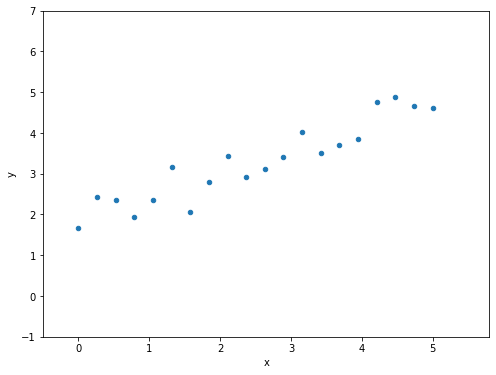

In [2]:
df.plot(x='x', y='y', kind='scatter', figsize=(8,6), xlim=[-0.5,5.8], ylim=[-1,7])

## The Error Function

#### Back to 2-dimensions

We define an *Error Function*, $E_i(w_0, w_1)$ which characterizes the *error* of the prediction of our model for the $i$-th data point.  
There are many we could choose, but the one standard is:

$E_i(w_0, w_1) = \frac{1}{2}(\hat y_i - y_i)^2 = \frac{1}{2}\left({\bf w}\cdot\mathbb{x}_i - y_i\right)^2
= \frac{1}{2}\left(~w_0(1) + w_1x_i - y_i~\right)^2$

$~$

We also define the *Mean Squared Error* of the model on the entire data set by averaging this over all data:

$\displaystyle{
{\rm MSE}({\bf w}) = \frac{1}{N} \sum_i^N E_i({\bf w}) = \frac{1}{N} \sum_i^N\frac{1}{2}\left({\bf w}\cdot\mathbb{x}_i - y_i\right)^2
}$

Now we have to find the "*best*" values for ${\bf w}$, those that minimize the MSE.

---

Let's *look* at the Error function. For this problem, its a function of two variables, ${\bf w} = (w_0, w_1)$.

In [3]:
def E(w0, w1, x, y):
    N = len(x)
    return ((w0 + w1*x - y)**2).sum()/N

In [5]:
print(E(1,2,x,y))
print(E(2,0.5,x,y))

12.064290997864457
0.1363697371708569


In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def linmodel2(w0, w1):
    df.plot(x='x', y='y', kind='scatter', figsize=(8,6), xlim=[-0.5,5.8], ylim=[-1,7])
    plt.plot(x, w1*x + w0, '-r', label=r'$\haty = w_1 x + w_0$')
    for i in range(len(df.x)):
#        print([df['x'].iloc[i], df['x'].iloc[i]], [df['y'].iloc[i], w1*df['x'].iloc[i] + w0])
        plt.plot([df['x'].iloc[i], df['x'].iloc[i]], [df['y'].iloc[i], w1*df['x'].iloc[i] + w0], '-k')
    plt.xlabel('x data (independent)')
    plt.ylabel('y data (dependent)')
    plt.text(3, 0, 'Error = {:.3f}'.format(E(w0,w1,x,y)))
    plt.legend(fontsize=16)
    plt.show()
    
w2 = interactive(linmodel2, w0=1.0, w1=1.0)
display(w2)

interactive(children=(FloatSlider(value=1.0, description='w0', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

---

## Plot the Error function $E(w_0, w_1, {\rm data})$

In [8]:
from mpl_toolkits import mplot3d

w0mesh = np.linspace(1, 3, 50)
w1mesh = np.linspace(0, 1, 50)
W0, W1 = np.meshgrid(w0mesh, w1mesh)
Z = np.empty_like(W0)
for i in range(50):
    for j in range(50):
        Z[i,j] = E(W0[i,j], W1[i,j], x,y)

<IPython.core.display.Javascript object>


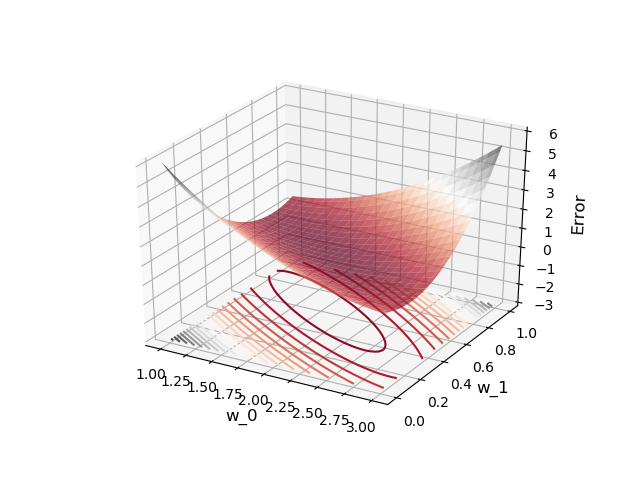

(-3, 6)

In [16]:
%matplotlib notebook 

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W0, W1, Z, cmap='RdGy', edgecolor=None, rstride=2, cstride=2, alpha=0.7)
ax.contour3D(W0, W1, Z, 20, cmap='RdGy', offset=-3)
#ax.contourf(W0, W1, Z, 28, cmap='RdGy')

ax.set_xlabel('w_0', fontsize=12)
ax.set_ylabel('w_1', fontsize=12)
ax.set_zlabel('Error', fontsize=12)
ax.set_zlim(-3,6)



**Exact values**

In [15]:
w = np.polyfit(x,y,1)[::-1]
w

array([1.808, 0.591])